In [1]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
#importing and reading the dataset
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)

In [3]:
#print the head of the dataset
print(housing_data.frame.head())

#print the dimension of the dataset
print(housing_data.frame.shape)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)


In [4]:
#description of the dataset
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
#create a correlation matrix
housing_data_corr = housing_data.frame.corr()
print(housing_data_corr)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

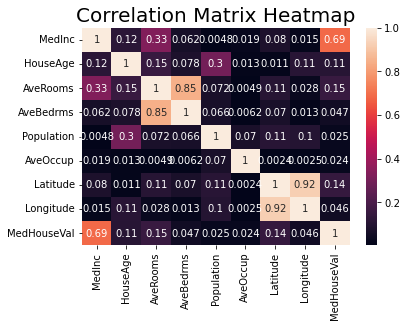

In [6]:
#Plot the correlation matrix
sn.heatmap(abs(housing_data_corr), annot=True)
plt.title("Correlation Matrix Heatmap", fontsize = 20)
plt.show()

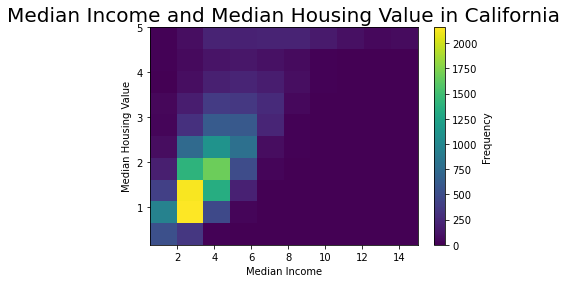

In [7]:
#Plot a 2-D histogram
plt.hist2d(housing_data.frame.MedInc,housing_data.frame.MedHouseVal)
plt.title("Median Income and Median Housing Value in California", fontsize = 20)
plt.xlabel("Median Income")
plt.ylabel("Median Housing Value")
plt.colorbar(label = "Frequency")

In [8]:
#specify x and y
x = housing_data.frame.Longitude
y = housing_data.frame.Latitude

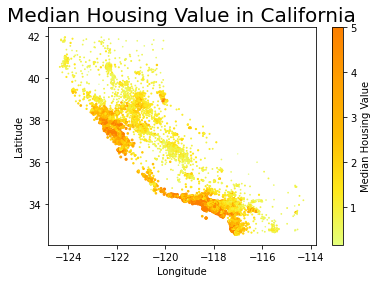

In [9]:
#Scatterplot for the housing value based on the region
plt.scatter(x,y, s = housing_data.frame.MedHouseVal, c = housing_data.frame.MedHouseVal, cmap = "Wistia")
plt.title("Median Housing Value in California", fontsize = 20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label = 'Median Housing Value')


In [10]:
#specify dependent and independent variable
X = housing_data.data
X.shape
y = housing_data.target
y.shape

(20640,)

In [11]:
#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
#import the mean squared error function
from sklearn.metrics import mean_squared_error as mse, r2_score as r_2

#create a function to print the prediction result
def regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print('MSE Train: ', round(mse(y_train, y_train_pred), 3))
    print('MSE Test: ', round(mse(y_test, y_test_pred), 3))

    print('R^2 Train: ', round(r_2(y_train, y_train_pred), 3))
    print('R^2 Test: ', round(r_2(y_test, y_test_pred), 3))

In [13]:
#2.1 ordinary least squares(OLS)
from sklearn.linear_model import LinearRegression # OLS

# create an OLS model
slr = LinearRegression()

# train the model
slr.fit(X_train, y_train)

#evaluation 
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  0.517
MSE Test:  0.543
R^2 Train:  0.611
R^2 Test:  0.593


In [14]:
# w1, w2, ..., w13: weights of the 13 features in the linear model
#  if the weight is negative, the corresponding feature contribute negatively to the median housing value
slr.coef_

array([ 4.46773975e-01,  9.18409990e-03, -1.18116775e-01,  6.42290879e-01,
       -9.37026507e-06, -4.08535934e-03, -4.09023312e-01, -4.23419564e-01])

In [15]:
#w0
slr.intercept_

-36.012228887652334

In [16]:
#Ridge regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV

#create parameter grid to select the best estimator
param_grid = [
    {'alpha': [0.1,0.5,1,5,10,20,30,40,50,100,150,200]}
  ]

#fit the model
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 5, 10, 20, 30, 40, 50, 100,
                                    150, 200]}])

In [17]:
#get the best estimator
grid_search.best_estimator_

Ridge(alpha=100)

In [18]:
# Ridge regression
#The result does not change even if we increase the value of alpha which means that there are no outliers to work with.
ridge = Ridge(alpha=100) # 
ridge.fit(X_train, y_train)

#predict the model
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

#get the results
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  0.518
MSE Test:  0.544
R^2 Train:  0.611
R^2 Test:  0.592


In [19]:
ridge.coef_

array([ 4.35083963e-01,  9.41325495e-03, -9.57566904e-02,  5.27853949e-01,
       -8.37548183e-06, -4.16835742e-03, -4.06373703e-01, -4.19104255e-01])

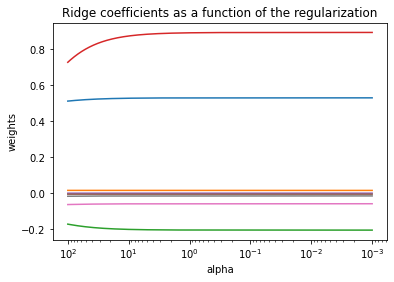

In [20]:
# shrink weights
n_alphas = 2000
alphas = np.logspace(-3, 2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [21]:
#Lasso regularization
from sklearn.linear_model import Lasso, LassoCV

#fit the model
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 5, 10, 20, 30, 40, 50, 100,
                                    150, 200]}])

In [22]:
#get the best estimator
grid_search.best_estimator_

Lasso(alpha=0.1)

In [23]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

#predict the model
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

#get the results
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  0.598
MSE Test:  0.624
R^2 Train:  0.551
R^2 Test:  0.532


In [24]:
#Elastic net regularization
from sklearn.linear_model import ElasticNet

#fit the model
elanet = ElasticNet()
grid_search = GridSearchCV(elanet, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 5, 10, 20, 30, 40, 50, 100,
                                    150, 200]}])

In [25]:
#get the best estimator
grid_search.best_estimator_

ElasticNet(alpha=0.1)

In [26]:
# Elastic Net

elanet = ElasticNet(alpha=0.1, l1_ratio=1)
elanet.fit(X_train, y_train)

#predict the model
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

#get the results
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  0.598
MSE Test:  0.624
R^2 Train:  0.551
R^2 Test:  0.532


In [27]:
from sklearn.tree import DecisionTreeRegressor as DTR

#create parameter grid to select the best estimator
param_grid = [
    {'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
  ]

#fit the model
dtr = DTR(criterion = 'squared_error', random_state = 0)
grid_search = GridSearchCV(dtr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}])

In [28]:
#get the best estimator
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=8, random_state=0)

In [29]:
# Decision tree example

dtr = DTR(criterion = 'squared_error', max_depth = 8, random_state = 0) 
#other input parameters of decision tree regressor: 
# max_depth: max depth of the tree; deep tree results in overfitting
# min_samples_leaf: min # of samples for leaf nodes; increase this number can solve the overfitting problem

#fit the model
dtr.fit(X_train, y_train)

#predict the model
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
print('Results of decision tree:')

#Overfitting because training performance is much better than testing performance when using default max_depth
#So I used max_depth = 8
#get the results
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Results of decision tree:
MSE Train:  0.325
MSE Test:  0.443
R^2 Train:  0.756
R^2 Test:  0.667


In [30]:
#atrributes
dtr.feature_importances_

array([0.66981416, 0.03898021, 0.03033819, 0.00831685, 0.00707675,
       0.13817991, 0.05241973, 0.0548742 ])

In [31]:
#Print the depth and nodes
print('depth of the tree:', dtr.tree_.max_depth)
print('the number of nodes:', dtr.tree_.node_count)

depth of the tree: 8
the number of nodes: 445


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

#create parameter grid to select the best estimator
param_grid={
    'n_estimators':[10,11,12,13,14,15],'max_features':[2,3,4,5,6,7,8],
    'max_depth':[2,3,4,5,6,7,8],
}

#fit the model
rf = RFR(criterion = 'squared_error', random_state = 0)
grid_search=GridSearchCV(rf, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [10, 11, 12, 13, 14, 15]})

In [33]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=13,
                      random_state=0)

In [34]:
# Random forests
#max_feature = sqrt (n_features)
rf = RFR(criterion = 'squared_error', n_estimators = 13, max_features = 3, max_depth = 8, random_state = 0)
#other arguments;
#criterion, min_sample_leaf, random_state
#max_features: specify any number <= total # of features; adaptive way to setl sqrt (n_features) log2

rf.fit(X_train, y_train)

#predict the model
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Results:')

#get the results
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)


Results:
MSE Train:  0.264
MSE Test:  0.333
R^2 Train:  0.802
R^2 Test:  0.751
